확률적 경사 하강법

점짐적인 훈련

- 훈련 데이터가 한 번에 준비되는 것이 아닌 조금씩 전달될 때

- 점진적 학습 or 온라인 학습 

- 대표적 점진적 학습 알고리즘 == 확률적 경사 하강법(Stochastic Gradient Descent)

In [15]:
# ** 확률적 경사 하강법(Stochastic Gradient Descent) **
# 확률적 == 무작위하게, 랜덤하게
# 경사 == 기울기
# 경사를 따라 내려가는 방법

# 가장 가파른 길을 찾아 내려오지만 조금씩 내려오는 것이 중요.

# 전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련 세트에서 램덤하게 골라 가장 가파른 길 찾기
# == 랜덤하게 하나의 샘플을 고름 == 확률적 경사 하강법

# 랜덤하게 하나 선택해 경사를 조금 내려가고 다음 훈련 세트에서 랜덤하게 또 다른 샘플을 
# 하나 선택하여 경사를 조금 내려감 >> 전체 샘플을 모두 사용할 때까지 계속

# 모든 샘플을 사용했는데 아직 다 내려오지 못했다면 다시 처음부터 랜덤하게 시작함!

In [16]:
# 에포크 epoch: 확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 것.
#  (일반적으로 경사 하강법은 수십, 수백번 이상 에포크를 수행함.)

In [17]:
# 미니매치 경사 하강법(minibatch gradient descent):
# 1개씩이 아닌 무작위로 몇 개의 샘플을 선택해서 경사 내려가는 방법 (실전에서 많이 사용.)

In [18]:
# 배치 경사 하강법(batch gradient descent): 
# (극단적) 한 번 경사로를 따라 이동하기 위해 전체 샘플 이용
# 전체 데이터를 사용하기때문에 가장 안정적일 수 있으나 컴퓨터 자원을 많이 사용하게 됨.
# (전체 데이터가 너무 많으면 한 번에 전체 데이터를 읽을 수 없을 수도 있음.)

손실함수(loss function)

- 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준 == 작을 수록 좋음
- 최솟값을 알지 못하기 때문에 가능한 많이 찾아보고 
- 만족할 수준일 때 산을 내려와다고 인정해야함. 

In [19]:
# 생선 맞추기 

# 분류에서 손실 == 정답을 못 맞히는 것.

# 샘플 4개의 예측 확률이 각각 0.9, 0.3, 0.2, 0.8이라고 가정

로지스틱 손실 함수

- 이진 분류 == 로지스틱 손실 함수 사용
- 다중 분류 == 크로스엔트로피 손실 함수 사용

SGDClassifier

In [20]:
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv_data')

In [21]:
fish.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [62]:
# 데이터 넘파이 배열로 바꾸고 세트 나누고 표준화 전처리까지는 basic 단계니 순서 익히기

# Species를 제외한 나머지를 입력데이터. Species 열은 타깃 데이터.
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

# 훈련 세트 테스트 세트 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

# 훈련하기 이해 특성 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

In [63]:
# 사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스는
# SGDClassifier

from sklearn.linear_model import SGDClassifier
# SGD는 객체를 만들 때 2개의 매개변수를 지정해야함.
# loss는 손실함수의 종류 loss='log'로 지정 >> 로지스틱 손실 함수
# max_iter=  수행할 에포크 횟수 지정
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled, test_target))

# 출력된 훈련 세트와 테스트 세트의 정확도가 낮음.
# 지정한 횟수 10번이 부족한 것으로 보임.

0.773109243697479
0.775


c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [64]:
# 모델을 이어서 훈련할 때 partial_fit() 메서드 사용
# fit() 메서드와 사용법은 같지만 호출할 때마다 1에포크씩 이어서 훈련 가능
sc.partial_fit(train_scaled,train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [25]:
# 확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소적합이나 과대적합이 될 수 있음.

# 조기종료(early stopping) : 과대적합이 시작되기 전에 훈련을 멈추는 것.

In [65]:
# 에포크에 따른 정확도 그래프 나타내기
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [66]:
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

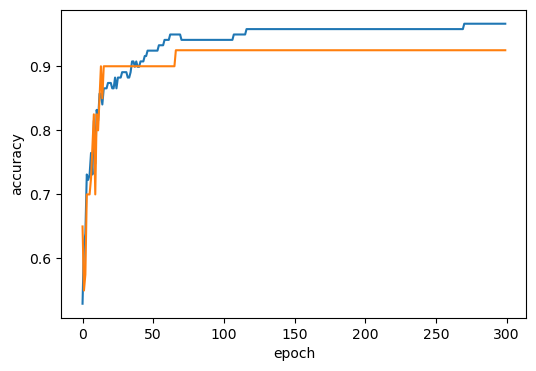

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [33]:
# epoch를 100에 두고 모델 훈련

sc = SGDClassifier(loss='log',max_iter=100,tol=None,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.9


In [ ]:
# SGDClassifier의 loss 매개변수
# loss 매개변수의 기본값 == 'hinge'

# 힌지 손실(hinge loss)은 서포트 벡터 머신(support vector machine)이라고 불리는 
# 또 다른 머신러닝 알고리즘을 위한 손실 함수.

In [35]:
# hinge 손실 사용하여 반복 횟수동안 모델 훈련

sc = SGDClassifier(loss='hinge',max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.9


코드 적어보기

In [41]:
#  파일읽기
import numpy as np
import pandas as pd
fish_data = pd.read_csv('http://bit.ly/fish_csv_data')
fish_data.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [70]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target)

# 표준화 처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

In [73]:
# SGDClssifier() 이용하여 손실함수

from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log')


c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


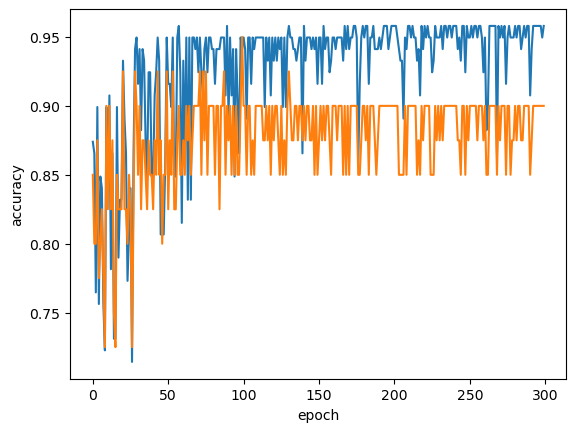

In [74]:
# 그래프 그려보기
sc = SGDClassifier(loss='log', max_iter=10)
sc.fit(train_scaled, train_target)
train_score = []
test_score = []
classes = np.unique(train_target)
for _ in range(300):
    sc.partial_fit(train_scaled, train_target, classes)
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target))

import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
    

In [ ]:
다시 해보기

In [44]:
import numpy as np
import pandas as pd
fish_data = pd.read_csv('http://bit.ly/fish_csv_data')

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

from sklearn.model_selection import train_test_split
trian_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

In [82]:
import numpy as np
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=10, tol=None)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


0.6302521008403361
0.725


In [83]:
train_score = []
test_score = []
classes = np.unique(train_target)

for _ in range(300):
    sc.partial_fit(train_scaled, train_target, classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

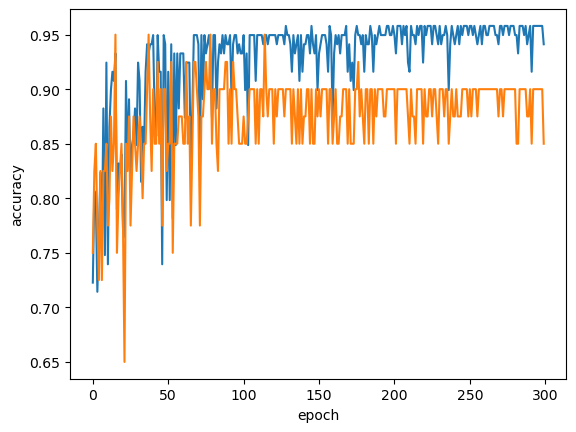

In [84]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [81]:
sc = SGDClassifier(loss='log',max_iter=100, tol=None)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.9


In [ ]:
# ** 키워드 핵심 포인트 **

# ** 확률적 경사 하강법 :  훈련 세트에서 샘플 하나씩 꺼내 손실 함수의 경사를 따라 
#   최적의 모델을 찾는 알고리즘
#   * 미니배치 경사 하강법 : 샘플을 하나씩 사용하지 않고 여러 개 사용
#   * 배치 경사 하강법 : 한번에 전체 샘플 사용

# ** 손실 함수 : 확률적 경사 하강법이 최적화할 대상.
#   대부분 문제에 잘 맞는 손실 함수는 이미 정의되어 있음.
#   이진 분류 = 로지스틱 회귀(또는 이진 크로스엔트로피) 손실함수 사용
#   다중 분류 = 크로스엔트로피 손실 함수 사용
#   회귀 문제 = 평균 제곱 오차 손실 함수 사용

# ** 에포크 : 확률적 경사 하강법에 전체 샘플을 모두 사용하는 '한 번 반복을 의미'
#   일반적으로 경사 하강법 알고리즘에서는 수십에서 수백번의 에포크 반복

In [ ]:
# ** 핵심 패키지와 함수 **
# ** scikit-learn
#   ** SGDClassifier 확률 경사 하강법을 사용한 분류 모델을 만듦
#   * loss 매개변수 : 확률적 경사 하강법으로 최적화할 손실 함수 지정.
#     기본값 = 'hinge' 손실 함수  , 로지스틱 'log'
#   * penalty 매개변수 : 규제의 종류 지정 가능.
#     기본값 L2
#     규제 강도 alpha 매개변수에 지정 , 기본값 == 0.0001
#   * max_iter= 매개변수 : 에포크 횟수 지정. 기본값 == 1000
#   * tol 매개변수 : 반복을 멈출 조건
#     n_iter_no_change 매개변수에서 지정한 에포크 동안 손실이 tol만큼 줄어들지 않으면
#     알고리즘 중단.
#     기본값 == 0.001, n_iter_no_change 매개변수 기본값 == 5

# ** SGDRegressor는 확률적 경사 하강법을 사용한 회귀 모델을 만듦
# loss매개변수에 손실 함수 지정.
# 기본값은 제곱 오차를 나타내는 'squared loss'

확인 문제

In [ ]:
1. 다음 중 표준화 같은 데이터 전처리를 수행하지 않아도 되는 방식으로 구현된 클래스

1.KNeighborsClassfier <<
2.LinearRegressin
3.Ridge
4.SGDClassifier

In [ ]:
2. 경사 하강법 알고리즘의 하나로 훈련 세트에서 몇 개의 샘플을 뽑아서 훈련하는 방식?

1. 확률적 경사 하강법 >>
2. 배치 경사 하강법
3. 미니 배치 경사 하강법
4. 부분배치 경사 하강법